In [54]:
import pandas as pd
data= pd.read_csv('ms2.csv', encoding='utf8',engine='python')
data['deal']=data['deal'].apply(lambda x:x.replace('+', '').replace('万', '0000'))
data['price'].replace('¥', '', regex=True, inplace=True)
data['province']=data.location.apply(lambda x:x.split()[0])
data['city']=data.location.apply(lambda x:x.split()[0] if len(x)<4 else x.split()[1])
data.drop('location',axis=1, inplace=True)

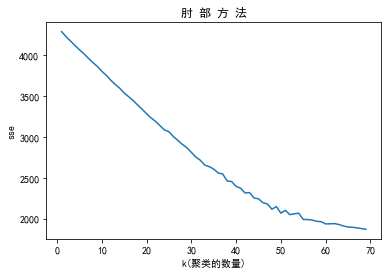

In [55]:
# 数据预处理
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
x = data.title
# 停用词
stopwords = []
with open('stop_words2.txt', errors='ignore') as sf:
    for line in sf.readlines():
        stopwords.append(line.strip())
# 分词处理
def text_cut(in_text):
    words = jieba.lcut(in_text)
    cut_text = ' '.join([w for w in words if w not in stopwords and len(w) > 1])
    return cut_text
x_change = []
for i in x:
    x_change.append(text_cut(i))
# 特征提取
vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1,2), strip_accents='unicode', norm='l2', token_pattern=r"(?u)\b\w+\b")
X = vectorizer.fit_transform(x_change)
# 聚类-手肘图
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
n_clusters= 70
wcss = []
for i in range(1,n_clusters):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,n_clusters),wcss)
plt.title('肘 部 方 法')
plt.xlabel('k(聚类的数量)')
plt.ylabel('sse')
plt.show()

In [56]:
# 8个类
km_cluster  = KMeans(n_clusters=40, init='k-means++', max_iter=300, n_init=10)#init获取初始簇中心的更迭次数
km_cluster .fit(X)
labels = km_cluster.fit_predict(X)
data['label'] = labels
data['label'].value_counts()

32    1968
11     154
2      128
17     120
8      110
29     104
10     103
12      87
7       72
26      55
18      53
16      53
38      52
28      52
3       52
36      52
14      52
20      52
1       52
35      52
4       52
21      52
13      51
5       51
9       51
39      51
37      51
25      51
33      51
6       51
22      51
30      51
15      51
19      51
23      51
27      51
31      51
0       51
24      32
34      28
Name: label, dtype: int64

In [57]:

import jieba, re
import collections     
for i in range(0,40):
    df = data.loc[data['label'] == i,'title']
    file_userdict = 'test2.txt' #此处文件名为用户自定义的文件名，内容为不想被分开的词
    jieba.load_userdict(file_userdict)
    
    # 文本分词pattern = re.compile(u'[\t|\n|\.|\-|\:|\;|\)|\(|\?|【|】|a-zA-Z0-9|\"]') # 定义正则表达式匹配模式（空格等）
    seg_list_exact = jieba.cut(re.sub(re.compile(u'[\t|\n|\.|\-|\:|\;|\)|\(|\?|【|】|a-zA-Z0-9|\"]'), '', ''.join(i for i in df))
                               , cut_all=False, HMM=True)  # 精确模式分词+HMM
    object_list = []
    # 去除停用词（去掉一些意义不大的词，如标点符号、嗯、啊等）
    with open('stop_words.txt', 'r', encoding='UTF-8') as meaninglessFile:
        stopwords = set(meaninglessFile.read().split('\n'))
    stopwords.add(' ')
    for word in seg_list_exact:  # 循环读出每个分词
        if word not in stopwords:  # 如果不在去除词库中
            object_list.append(word)  # 分词追加到列表
    # 词频统计
    word_counts = collections.Counter(object_list)  # 对分词做词频统计
    word_counts_top = word_counts.most_common(15)  # 获取前number个最高频的词
    word_counts_top = pd.DataFrame(word_counts_top,columns=['特征值最高的关键词', '得分'])
    word_counts_top['得分'] = word_counts_top['得分']/sum(word_counts_top['得分'])
    print('第'+str(i+1)+'类')
    print(word_counts_top.head())

第1类
  特征值最高的关键词        得分
0        岐山  0.076923
1        天缘  0.076923
2        醋粉  0.076923
3        陕西  0.076923
4        发酵  0.076923
第2类
  特征值最高的关键词        得分
0       荣欣堂  0.090909
1       太谷饼  0.090909
2        整箱  0.090909
3        山西  0.090909
4        特产  0.090909
第3类
  特征值最高的关键词        得分
0        特产  0.126482
1        卤味  0.102767
2        肉食  0.102767
3        熟食  0.102767
4       谭八爷  0.051383
第4类
  特征值最高的关键词        得分
0        牛肉  0.166667
1        冠云  0.083333
2        平遥  0.083333
3        一品  0.083333
4         香  0.083333
第5类
  特征值最高的关键词        得分
0         菜  0.214286
1        碗颂  0.071429
2       毛血旺  0.071429
3        功夫  0.071429
4       半成品  0.071429
第6类
  特征值最高的关键词   得分
0        无穷  0.1
1        酱卤  0.1
2        鸡爪  0.1
3         袋  0.1
4        卤味  0.1
第7类
  特征值最高的关键词        得分
0         金  0.083333
1        厨娘  0.083333
2        虎皮  0.083333
3        鸡爪  0.083333
4        卤味  0.083333
第8类
  特征值最高的关键词        得分
0        肉松  0.099585
1        早餐  0.099585
2       

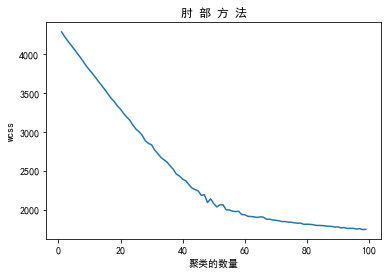

In [52]:
# 数据预处理
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
x = data.title
# 停用词
stopwords = []
with open('stop_words.txt', errors='ignore') as sf:
    for line in sf.readlines():
        stopwords.append(line.strip())
# 分词处理
def text_cut(in_text):
    words = jieba.lcut(in_text)
    cut_text = ' '.join([w for w in words if w not in stopwords and len(w) > 1])
    return cut_text
x_change = []
for i in x:
    x_change.append(text_cut(i))
# 特征提取
vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1,2), strip_accents='unicode', norm='l2', token_pattern=r"(?u)\b\w+\b")
X = vectorizer.fit_transform(x_change)
# 聚类-手肘图
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
n_clusters= 100
wcss = []
for i in range(1,n_clusters):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,n_clusters),wcss)
plt.title('肘 部 方 法')
plt.xlabel('聚类的数量')
plt.ylabel('wcss')
plt.show()

In [ ]:
# 8个类
km_cluster  = KMeans(n_clusters=38, init='k-means++', max_iter=300, n_init=10)
km_cluster .fit(X)
labels = km_cluster.fit_predict(X)
data['label'] = labels
data['label'].value_counts()

In [41]:
# 聚类结果分析
for i in range(0,50):
    print('第'+str(i)+'类')
    cluster_labels = km_cluster.labels_  # 聚类标签结果
    word_vectors = vectorizer.get_feature_names()  # 词向量
    word_values = X.toarray()  # 向量值
    comment_matrix = np.hstack((word_values,  cluster_labels.reshape(word_values.shape[0], 1)))  # 将向量值和标签值合并为新的矩阵
    word_vectors.append('cluster_labels')  # 将新的聚类标签列表追加到词向量后面
    comment_pd = pd.DataFrame(comment_matrix, columns=word_vectors)  # 创建包含词向量和聚类标签的数据框
    comment_cluster1 = comment_pd[comment_pd['cluster_labels'] == i].drop('cluster_labels', axis=1)  # 选择聚类标签值为1的数据，并删除最后一列
    word_importance = np.sum(comment_cluster1, axis=0)  # 按照词向量做汇总统计
    print(word_importance.sort_values(ascending=False)[:5])   # 按汇总统计的值做逆序排序并打印输出前5个词

第0类
懒人 家常     11.800722
毛血旺 功夫    11.800722
快手 预制     11.800722
碗颂 毛血旺    11.800722
家常 宴川辣    11.800722
dtype: float64
第1类
酱鸭 即食    12.441054
特产 鸭肉    12.441054
送礼 辣味    12.441054
初旭 舌头    12.441054
卤味 酱鸭    12.397483
dtype: float64
第2类
牛肉        17.911071
牛肉 一品     12.213573
牛肉 258    12.213573
平遥 牛肉     12.213573
258       12.213573
dtype: float64
第3类
桂花 零食      13.027173
五芳斋 绿豆糕    12.896770
老式 特产      12.829396
伴手礼 桂花     12.655336
绿豆糕 伴手礼    12.655336
dtype: float64
第4类
米饭       33.295881
自热       22.429062
自热 米饭    21.252471
煲仔饭      17.824695
方便       15.276325
dtype: float64
第5类
铁蛋 小包    12.833110
无壳 铁蛋    12.788166
袋装 网红    12.788166
卤蛋 无壳    12.788166
熟食 卤蛋    12.788166
dtype: float64
第6类
果蔬       12.476992
压片       12.217390
无限       12.007223
美食 伴侣    12.007223
果蔬 压片    12.007223
dtype: float64
第7类
开袋 即食     19.471799
开袋        19.311189
卤味        13.521802
嘉兴 五芳斋    12.738399
五芳斋 卤味    12.738399
dtype: float64
第8类
即食 独立     14.397816
德食 鹌鹑蛋    14.347393
盒装 休闲     14.347393

In [39]:
word_values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
data['province'].size

2097

In [23]:
data['city'].size

2097

In [106]:
comment_matrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  6.],
       [ 0.,  0.,  0., ...,  0.,  0.,  4.],
       [ 0.,  0.,  0., ...,  0.,  0.,  6.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0., 18.],
       [ 0.,  0.,  0., ...,  0.,  0.,  3.],
       [ 0.,  0.,  0., ...,  0.,  0.,  7.]])

In [107]:
word_values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
comment_matrix

array([[ 0.,  0.,  0., ...,  0.,  0., 12.],
       [ 0.,  0.,  0., ...,  0.,  0.,  4.],
       [ 0.,  0.,  0., ...,  0.,  0., 12.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  6.],
       [ 0.,  0.,  0., ...,  0.,  0., 26.],
       [ 0.,  0.,  0., ...,  0.,  0., 23.]])

In [45]:
cluster_labels

array([12,  4, 12, ...,  6, 26, 23])

In [46]:
comment_matrix

array([[ 0.,  0.,  0., ...,  0.,  0., 12.],
       [ 0.,  0.,  0., ...,  0.,  0.,  4.],
       [ 0.,  0.,  0., ...,  0.,  0., 12.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  6.],
       [ 0.,  0.,  0., ...,  0.,  0., 26.],
       [ 0.,  0.,  0., ...,  0.,  0., 23.]])